In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
x, y = make_blobs(n_samples=133, centers=2, n_features=2, random_state=0, cluster_std=.7)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

/tmp/ipykernel_12213/1732685277.py:3: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Train data: class 0', 'Train data: class 1')
/tmp/ipykernel_12213/1732685277.py:3: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Train data: class 0', 'Train data: class 1')
/tmp/ipykernel_12213/1732685277.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Train data: class 0', 'Train data: class 1')
/tmp/ipykernel_12213/1732685277.py:3: UserWarning: Legend does not sup

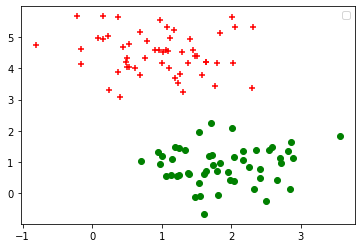

In [5]:
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='r', marker='+', label='0')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='g', marker='o', label='1')
plt.legend('Train data: class 0', 'Train data: class 1')
plt.show()

In [8]:
reg_param = 1
svc = svm.SVC(kernel='linear', C=reg_param)

svc.fit(x_train, y_train)
predict = svc.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, predict))
print('Confusion matrix: \n', confusion_matrix(y_test, predict))

Accuracy:  1.0
Confusion matrix: 
 [[12  0]
 [ 0 15]]
